In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
datos = pd.read_excel("C:/Modelo_ML/SVM - NN - RF/Base.xlsx")

In [3]:
datos.shape

(160446, 7)

In [4]:
datos.head(5)

,Dia,Arma_empleada,Metodo_agresor,Metodo_victima,Sexo,Estado_Civil,Escolaridad
0,1,2,4,1,2,4,3
1,1,12,1,1,2,4,5
2,1,12,1,1,1,4,2
3,1,12,1,1,2,4,5
4,1,12,1,1,1,4,5


In [5]:
predictors = datos.drop('Dia', axis=1)
target = datos['Dia']

In [6]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size = 0.20)  

In [7]:
from sklearn.svm import SVC
#svclassifier = SVC(kernel='linear')
svclassifier = SVC()
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [8]:
y_pred = svclassifier.predict(X_test)  

In [9]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))

[[  17  751   20  104   10  271 1837]
 [   5 1274   33  239   13  242 3353]
 [   8 1092   39  214   14  228 2786]
 [   7 1267   34  271   21  243 3186]
 [   8  958   26  212   14  196 2551]
 [  22 1117   20  196   14  389 2984]
 [  15 1322   43  272   15  330 3807]]


In [10]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          1       0.21      0.01      0.01      3010
          2       0.16      0.25      0.20      5159
          3       0.18      0.01      0.02      4381
          4       0.18      0.05      0.08      5029
          5       0.14      0.00      0.01      3965
          6       0.20      0.08      0.12      4742
          7       0.19      0.66      0.29      5804

avg / total       0.18      0.18      0.12     32090



In [11]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [12]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=2)
roc_auc = auc(fpr, tpr)

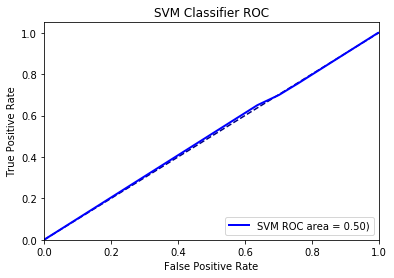

In [13]:
plt.figure()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('SVM Classifier ROC')
plt.plot(fpr, tpr, color='blue', lw=2, label='SVM ROC area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.show()

In [14]:
from sklearn.metrics import fbeta_score
fbeta_score(y_test, y_pred, average='macro', beta=0.5)

0.10730756967402491

In [15]:
fbeta_score(y_test, y_pred, average='micro', beta=0.5)

0.18108444998441883

In [16]:
fbeta_score(y_test, y_pred, average='weighted', beta=0.5)

0.11936864311300457

In [17]:
fbeta_score(y_test, y_pred, average=None, beta=0.5)

array([0.02546435, 0.17556431, 0.03720664, 0.12250249, 0.01602197,
       0.15764305, 0.21675017])